In [108]:
#Loading Required Packages 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [109]:
df = pd.read_csv('/Users/sameekshabs/Downloads/adult-all.csv')


In [110]:
# Display the first few rows to understand the data structure
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,Sex,Capital-gain,Capital-loss,Hour-per-week,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [111]:
# Check for missing values
print(df.isna().sum())

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hour-per-week     0
Native-country    0
Salary            0
dtype: int64


In [112]:
print(df.dtypes)

Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hour-per-week      int64
Native-country    object
Salary            object
dtype: object


In [114]:
# Replace most zeros in capital-gain, capital-loss, and hours-per-week columns with NaN
df.replace(0, np.nan, inplace=True)

# Dealing the Nan values with Mean imputation for the variables capital-gain and capital-loss
df['Capital-gain'] = df['Capital-gain'].fillna(df['Capital-gain'].mean())
df['Capital-loss'] = df['Capital-loss'].fillna(df['Capital-loss'].mean())

# Once the values are replaced, datatype changed to float, so let's round off the float and convert datatype to integer
df['Capital-gain'] = df['Capital-gain'].round().astype(int)
df['Capital-loss'] = df['Capital-loss'].round().astype(int)

# Now replace the "?" with Nan in the variables occupation, workclass, and native-country
df.replace('?', np.nan, inplace=True)

categorical_columns = ['occupation', 'workclass', 'Native-country']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Dealing Nan using One-hot encoding for the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   Age  fnlwgt education   education-num      marital-status   relationship  \
0   39   77516  Bachelors             13       Never-married  Not-in-family   
1   50   83311  Bachelors             13  Married-civ-spouse        Husband   
2   38  215646    HS-grad              9            Divorced  Not-in-family   
3   53  234721       11th              7  Married-civ-spouse        Husband   
4   28  338409  Bachelors             13  Married-civ-spouse           Wife   

    race     Sex  Capital-gain  Capital-loss  ...  Native-country_Portugal  \
0  White    Male          2174          1873  ...                    False   
1  White    Male         13062          1873  ...                    False   
2  White    Male         13062          1873  ...                    False   
3  Black    Male         13062          1873  ...                    False   
4  Black  Female         13062          1873  ...                    False   

  Native-country_Puerto-Rico  Native-country_Scotland  N

In [115]:
print(df.columns)

Index(['Age', 'workclass', 'fnlwgt', 'education ', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hour-per-week', 'Native-country',
       'Salary'],
      dtype='object')


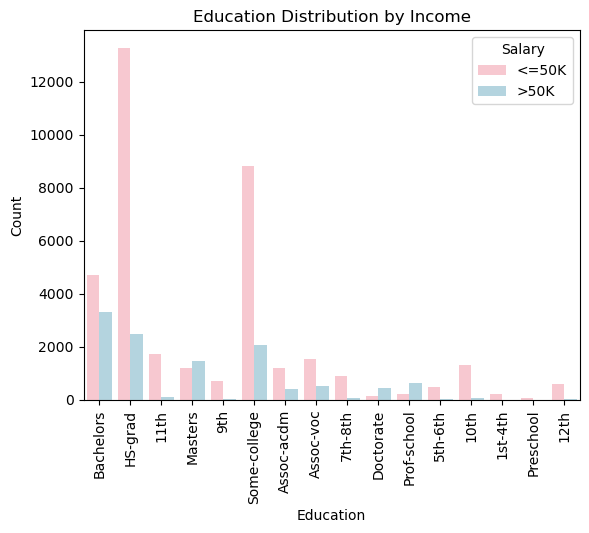

In [116]:
# Exploratory Data Analysis
#1. Education distribution by Income
sns.countplot(x='education ', hue='Salary', data=df, palette={'<=50K': 'pink', '>50K': 'lightblue'})
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution by Income')
plt.show()

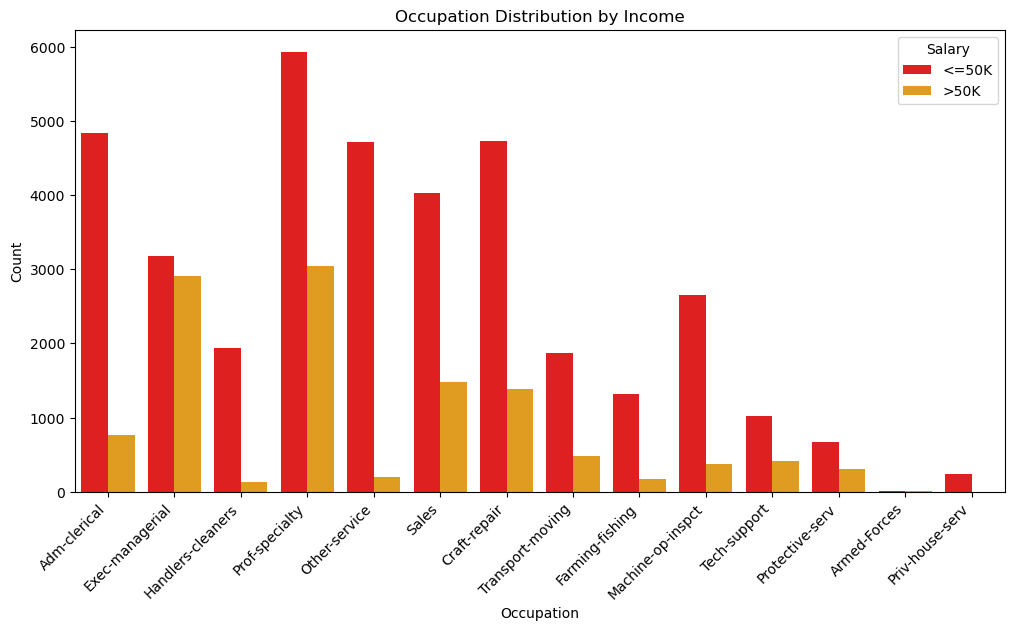

In [117]:
#2. Occupation distribution by Income
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='Salary', data=df, palette={'<=50K': 'red', '>50K': 'orange'})
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution by Income')
plt.show()

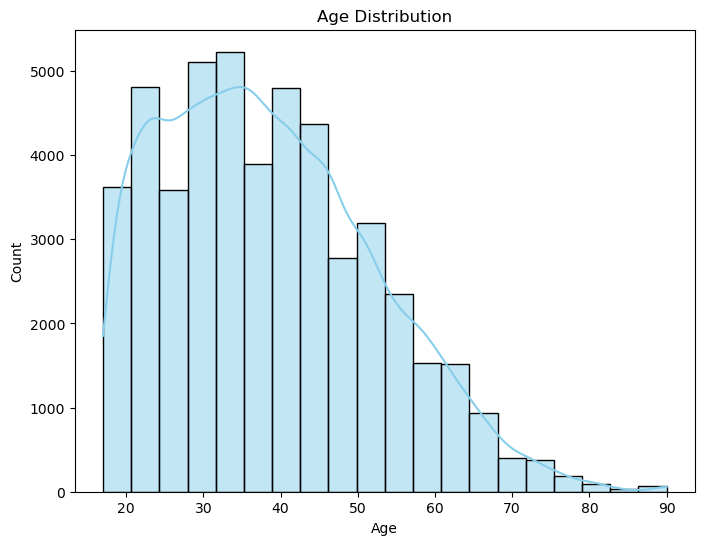

In [118]:
# 3: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

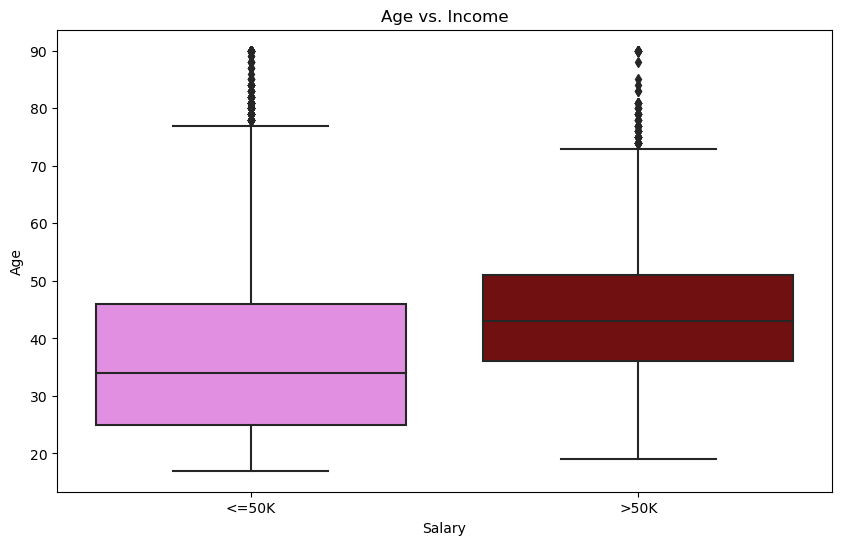

In [119]:
# 4: Age vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary', y='Age', data=df, palette={'<=50K': 'violet', '>50K': 'maroon'})
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Age vs. Income')
plt.show()

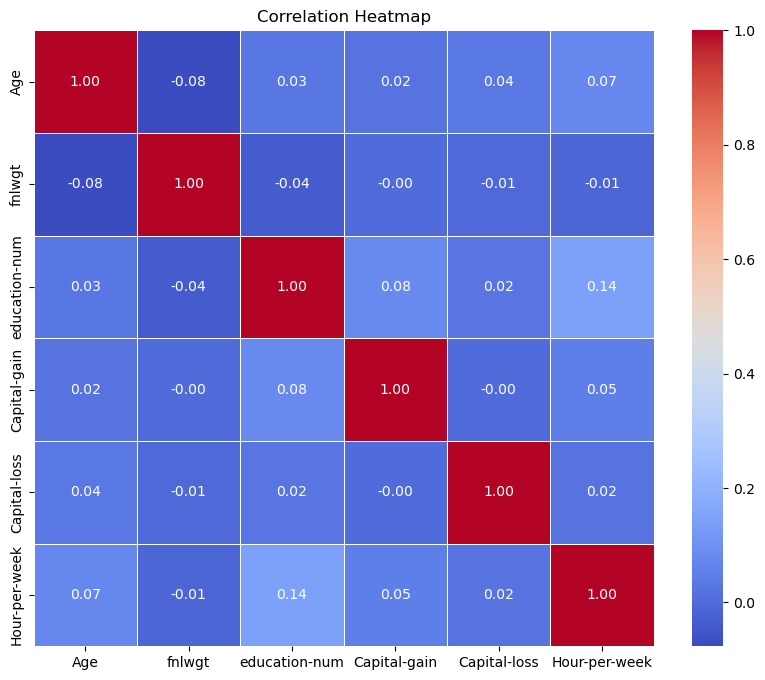

In [120]:
# 5: Correlation Heatmap
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


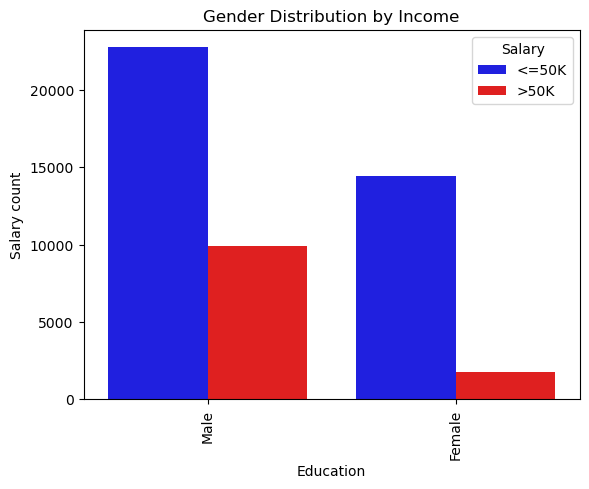

In [121]:
# 6: Gender Distribution by Income
sns.countplot(x='Sex', hue='Salary', data=df, palette={'<=50K': 'blue', '>50K': 'red'})
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.ylabel('Salary count')
plt.title('Gender Distribution by Income')
plt.show()

In [126]:
# Load the dataset and select the independent variables (X) and target variable (y)
X = df[['education ', 'occupation', 'Sex']]
y = df['Salary']

/var/folders/q4/f4mdy_c93cg3vc9r_2_2rxn80000gn/T/ipykernel_24745/166600943.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education '] = label_encoder_education.fit_transform(X['education '])
/var/folders/q4/f4mdy_c93cg3vc9r_2_2rxn80000gn/T/ipykernel_24745/166600943.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'] = label_encoder_occupation.fit_transform(X['occupation'])


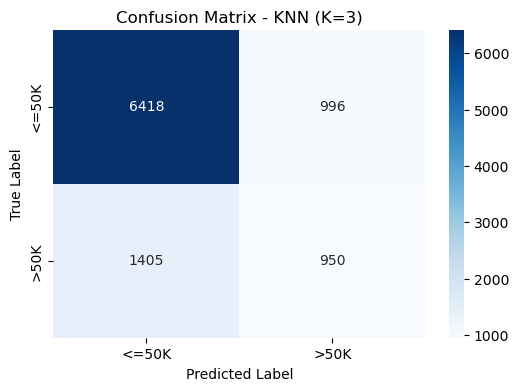

KNN Model with K=3
Accuracy: 0.7542


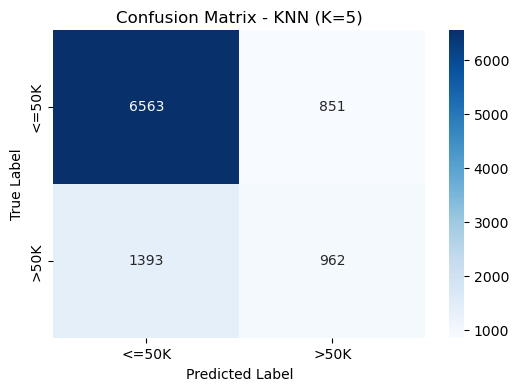

KNN Model with K=5
Accuracy: 0.7703


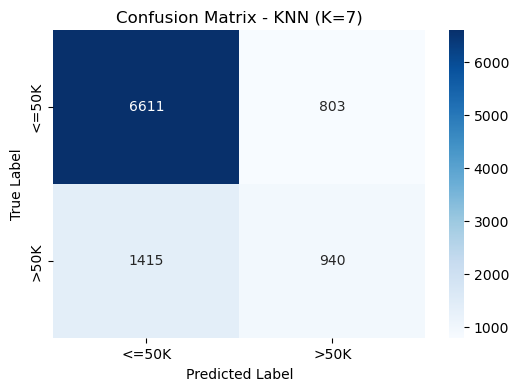

KNN Model with K=7
Accuracy: 0.7730


In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assume df is your original DataFrame with 'age', 'education', 'occupation', and 'income'
# ... (previous preprocessing steps)

# Split the data into features (X) and target variable (y)
X = df[['Age', 'education ', 'occupation']]
y = df['Salary']

# Apply label encoding to the 'education' column
label_encoder_education = LabelEncoder()
X['education '] = label_encoder_education.fit_transform(X['education '])

# Apply label encoding to the 'occupation' column
label_encoder_occupation = LabelEncoder()
X['occupation'] = label_encoder_occupation.fit_transform(X['occupation'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define K values
k_values = [3, 5, 7]

# Build and evaluate KNN models for each K value
for k in k_values:
    # Build KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.title(f"Confusion Matrix - KNN (K={k})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print(f"KNN Model with K={k}")
    print(f"Accuracy: {accuracy:.4f}")
    print("="*30)
